In [ ]:
%%capture
!pip install rdkit

In [ ]:
from rdkit import Chem



---

**AULA 2: EXTRAINDO DADOS DE MOLÉCULAS**

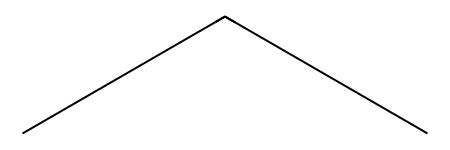

In [ ]:
#Definindo moléculas iniciais

mol1 = Chem.MolFromSmiles('CCC')
mol1

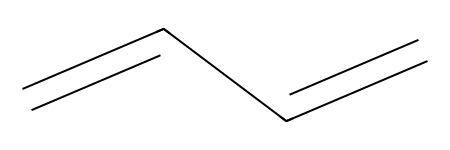

In [ ]:
mol2 = Chem.MolFromSmiles('C=CC=C')
mol2

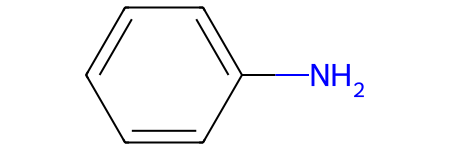

In [ ]:
mol3 = Chem.MolFromSmiles('C1=CC=CC=C1N')
mol3

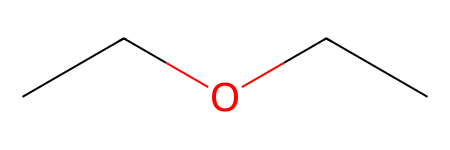

In [ ]:
mol4 = Chem.MolFromSmiles('CCOCC')
mol4

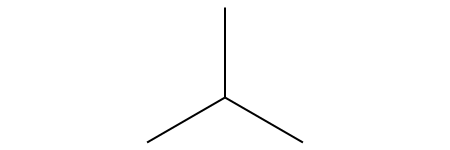

In [ ]:
mol5 = Chem.MolFromSmiles('CC(C)C')
mol5

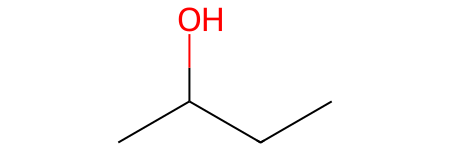

In [ ]:
mol6 = Chem.MolFromSmiles('CC(O)CC')
mol6


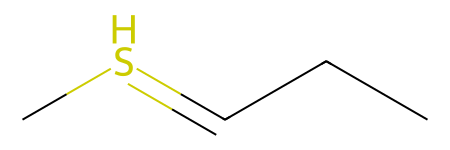

In [ ]:
mol7 = Chem.MolFromSmiles('CS=CCC')
mol7

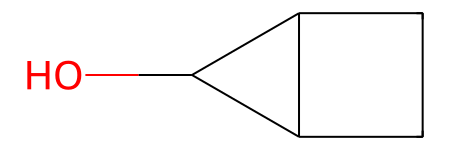

In [ ]:
mol8 = Chem.MolFromSmiles('OC1C2C1CC2')
mol8

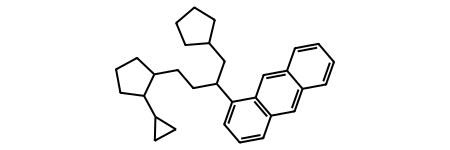

In [ ]:
mol9 = Chem.MolFromSmiles('C1(C(CCC1)CC(C=2(C=CC=C3(C=2C=C4(C(=C3)C=CC=C4))))CCC5(C(CCC5)C6(CC6)))')
mol9

**---- ÁTOMOS ----**

In [ ]:
#Função .GetNumAtoms()
#fornece o número de átomos existentes naquela molécula

print(mol1.GetNumAtoms())
print(mol2.GetNumAtoms())


3
4


In [ ]:
#Função .GetAtoms() e loop for
#a função cria uma espécie de lista com os átomos da molécula, com isso podemos acessá-los utilizando o loop for

for i in mol2.GetAtoms():
  print(i)


In [ ]:
#Função .GetAtomicNum()
#fornece o número atômico dos átomos da molécula

for i in mol2.GetAtoms():
  print(i.GetAtomicNum())

6
6
6
6


In [ ]:
for i in mol4.GetAtoms():
  print(i.GetAtomicNum())

6
6
8
6
6


In [ ]:
#Identificador de heteroátomos

for i in mol2.GetAtoms():
  x = i.GetAtomicNum()
  print(x)
  if x != 6:
    print("Molécula com heteroátomo")
  else:
    continue

6
6
6
6


In [ ]:
for i in mol4.GetAtoms():
  x = i.GetAtomicNum()
  print(x)
  if x != 6:
    print("^^^^ Heteroátomo identificado ^^^^")
  else:
    continue

6
6
8
^^^^ Heteroátomo identificado ^^^^
6
6


In [ ]:
#Função .GetAtomIdx() e .GetSymbol()
#acessa cada átomo da molécula por meio de seu índice.
#podemos projetar o SMILE desse átomo

print(mol4.GetAtomWithIdx(2).GetSymbol())

O


In [ ]:
#Importação do numpy para trabalhar arrays de tamanhos automáticos
import numpy as np


In [ ]:
#Representação dos índices e símbolos

x = mol3.GetNumAtoms()
print(f"Número de átomos na molécula: {x}\n")

for i in np.arange(0,x):
  i = int(i)                      #OBS: o RDkit não reconhece os números do numpy, por isso precisamos converte-lós em um inteiro do python
  print(f"Átomo de índice {i}")
  print(f"Símbolo {mol3.GetAtomWithIdx(i).GetSymbol()}\n")

Número de átomos na molécula: 7

Átomo de índice 0
Símbolo C

Átomo de índice 1
Símbolo C

Átomo de índice 2
Símbolo C

Átomo de índice 3
Símbolo C

Átomo de índice 4
Símbolo C

Átomo de índice 5
Símbolo C

Átomo de índice 6
Símbolo N



In [ ]:
#Função .GetExplicitValence()
#a função entrega o número de ligações que o átomo com aquele índice faz

print(mol5.GetAtomWithIdx(1).GetExplicitValence())

3


In [ ]:
x = mol5.GetNumAtoms()
print(f"Número de átomos na molécula: {x}\n")

for i in np.arange(0,x):
  i = int(i)
  print(f"Átomo de índice {i}")
  print(f"Símbolo {mol5.GetAtomWithIdx(i).GetSymbol()}")
  print(f"Número de ligações: {mol5.GetAtomWithIdx(i).GetExplicitValence()}\n")

Número de átomos na molécula: 4

Átomo de índice 0
Símbolo C
Número de ligações: 1

Átomo de índice 1
Símbolo C
Número de ligações: 3

Átomo de índice 2
Símbolo C
Número de ligações: 1

Átomo de índice 3
Símbolo C
Número de ligações: 1



In [ ]:
#Função .GetNeighbors()
#cria uma espécie de lista com os átomos vizinhos ao átomo especificado

print("Os átomos vizinhos são:")
for i in mol6.GetAtomWithIdx(1).GetNeighbors():
  print(i.GetSymbol())

Os átomos vizinhos são:
C
O
C


**---- LIGAÇÕES ----**

In [ ]:
#Função .GetBonds()
#armazena todas as ligações da molécula em uma espécie de lista
#Função .GetBondType() fornece o tipo de cada ligação

print("Tipos de ligação da molécula:")
for i in mol1.GetBonds():
  print(i.GetBondType())

Tipos de ligação da molécula:
SINGLE
SINGLE


In [ ]:
#Função .GetBondWithIdx()
#acessa uma ligação pelo seu índice

print(mol2.GetBondWithIdx(2).GetBondType())

DOUBLE


In [ ]:
#Funções .GetBeginAtomIdx() e .GetEndAtomIdx()
#usando elas na função anterior, obtemos o índice do átomo no começo e final da ligação

print(mol2.GetBondWithIdx(2).GetBeginAtomIdx())
print(mol2.GetBondWithIdx(2).GetEndAtomIdx())

2
3


In [ ]:
#Podemos identificar os átomos que compõem a ligação

x_begin = mol7.GetBondWithIdx(1).GetBeginAtomIdx()
x_end = mol7.GetBondWithIdx(1).GetEndAtomIdx()

print(f"Símbolo do átomo no começo da ligação: {mol7.GetAtomWithIdx(x_begin).GetSymbol()}")
print(f"Símbolo do átomo no fim da ligação: {mol7.GetAtomWithIdx(x_end).GetSymbol()}")

Símbolo do átomo no começo da ligação: S
Símbolo do átomo no fim da ligação: C


In [ ]:
#Função .GetBondBetweenAtoms()
#informamos o índice dos dois átomos que compõem a ligação e conseguimos acessar a ligação

print(mol7.GetBondBetweenAtoms(x_begin, x_end).GetBondType())

DOUBLE


**---- ANÉIS ----**

In [ ]:
#Função .IsInRing()
#entrega na forma de variável booleana (true or false) se o átomo está em um ánel

mol8.GetAtomWithIdx(0).IsInRing()

False

In [ ]:
#Função .IsInRingSize()
#podemos especificar o tamanho do anel que queremos

mol8.GetAtomWithIdx(1).IsInRingSize(3)
mol8.GetAtomWithIdx(1).IsInRingSize(4)

#OBS: a função não funciona bem para anéis formados por outros anéis
#no caso da mol8 o não funciona bem para o anel de 5 carbonos

mol8.GetAtomWithIdx(1).IsInRingSize(5)


False

In [ ]:
#Função .GetSymmSSSR()
#cria uma espécie de lista com todos os anéis simples da molécula

print(len(Chem.GetSymmSSSR(mol8)))     #podemos usar len() para saber a quantidade de anéis na molécula
print(len(Chem.GetSymmSSSR(mol9)))

2
6
